In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
from datasets import load_dataset
dataset = load_dataset("cnn_dailymail", name="3.0.0")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [3]:
train = dataset['train']
train[0]

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

In [4]:
import pandas as pd

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(dataset['train'])

# Calculate the length of articles and summaries
df['article_length'] = df['article'].apply(lambda x: len(x.split()))
df['summary_length'] = df['highlights'].apply(lambda x: len(x.split()))

# Print basic statistics
print("Article Length Statistics:")
print(df['article_length'].describe())
print("\nSummary Length Statistics:")
print(df['summary_length'].describe())

Article Length Statistics:
count    287113.000000
mean        691.870326
std         336.500292
min           8.000000
25%         443.000000
50%         632.000000
75%         877.000000
max        2347.000000
Name: article_length, dtype: float64

Summary Length Statistics:
count    287113.000000
mean         51.574101
std          21.256336
min           4.000000
25%          38.000000
50%          48.000000
75%          60.000000
max        1296.000000
Name: summary_length, dtype: float64


In [5]:
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])
val_df = pd.DataFrame(dataset['validation'])

In [6]:
# Find rows with null values in train_df
rows_with_nulls_train = train_df[train_df.isnull().any(axis=1)]

# Print the rows with null values in train_df
print("Rows with null values in train_df:")
print(rows_with_nulls_train)

# Find rows with null values in test_df
rows_with_nulls_test = test_df[test_df.isnull().any(axis=1)]

# Print the rows with null values in test_df
print("\nRows with null values in test_df:")
print(rows_with_nulls_test)


# Find rows with null values in val_df
rows_with_nulls_val = val_df[val_df.isnull().any(axis=1)]

# Print the rows with null values in val_df
print("\nRows with null values in val_df:")
print(rows_with_nulls_val)


Rows with null values in train_df:
Empty DataFrame
Columns: [article, highlights, id]
Index: []

Rows with null values in test_df:
Empty DataFrame
Columns: [article, highlights, id]
Index: []

Rows with null values in val_df:
Empty DataFrame
Columns: [article, highlights, id]
Index: []


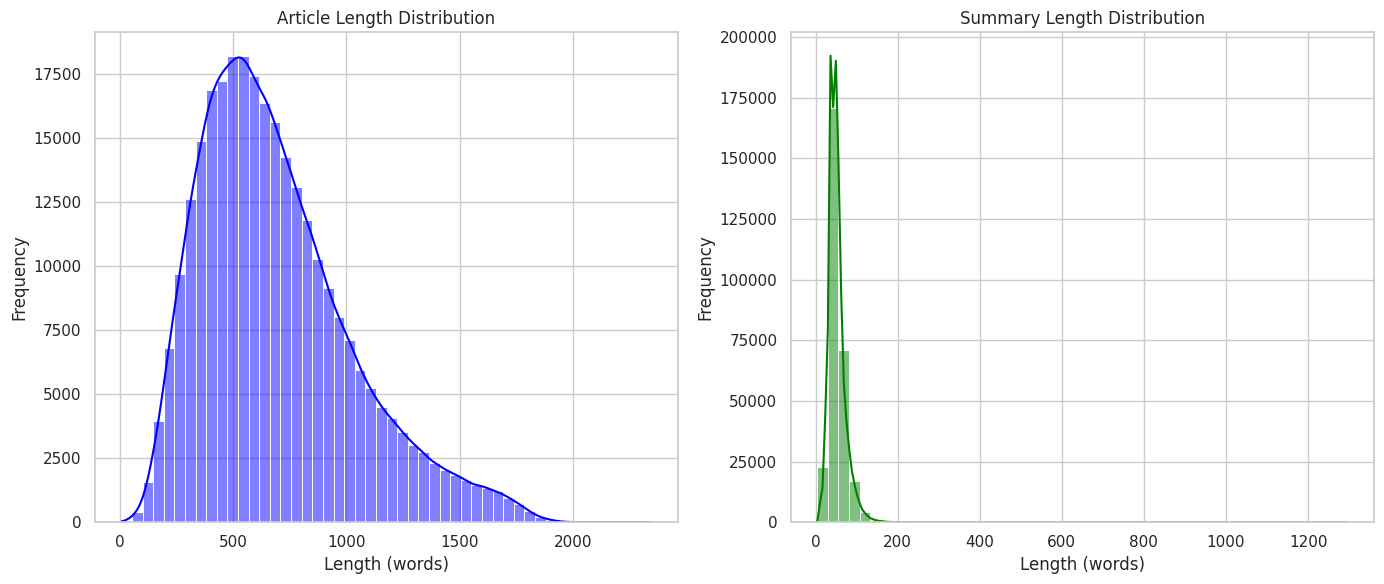

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create histograms for article and summary lengths
plt.figure(figsize=(14, 6))

# Plot article lengths
plt.subplot(1, 2, 1)
sns.histplot(df['article_length'], bins=50, color='blue', kde=True)
plt.title('Article Length Distribution')
plt.xlabel('Length (words)')
plt.ylabel('Frequency')

# Plot summary lengths
plt.subplot(1, 2, 2)
sns.histplot(df['summary_length'], bins=50, color='green', kde=True)
plt.title('Summary Length Distribution')
plt.xlabel('Length (words)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
# Calculate compression ratio
df['compression_ratio'] = df['article_length'] / df['summary_length']

# Print basic statistics of compression ratios
print("Compression Ratio Statistics:")
print(df['compression_ratio'].describe())

Compression Ratio Statistics:
count    287113.000000
mean         14.802580
std           9.083339
min           0.052632
25%           8.871795
50%          12.764706
75%          18.250000
max         215.571429
Name: compression_ratio, dtype: float64


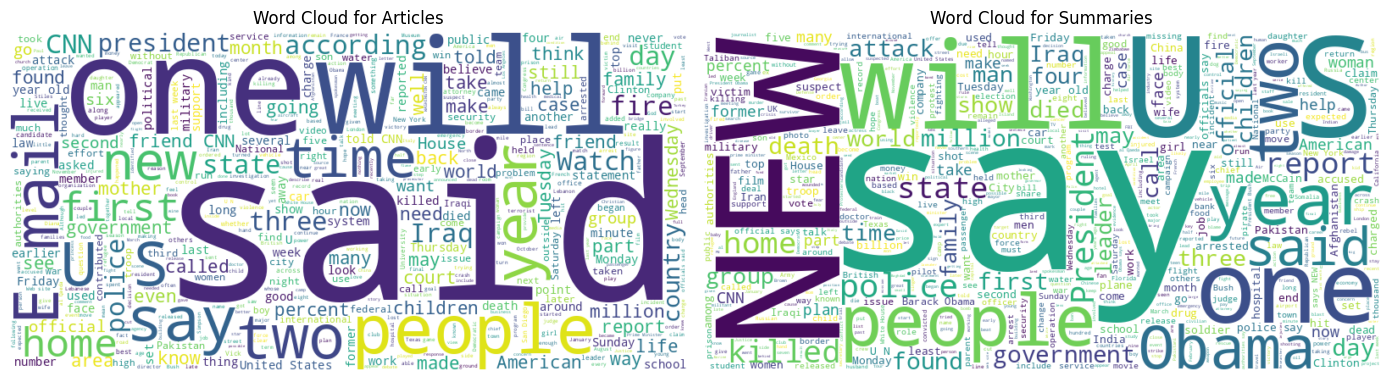

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud from text
def generate_wordcloud(text, max_words=5000):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=max_words).generate(text)
    return wordcloud

# Limit the amount of text to avoid memory issues
article_text = ' '.join(df['article'].astype(str))[:1000000]  # Limit to first 1 million characters
summary_text = ' '.join(df['highlights'].astype(str))[:1000000]  # Limit to first 1 million characters

# Generate word clouds
wordcloud_article = generate_wordcloud(article_text)
wordcloud_summary = generate_wordcloud(summary_text)

# Plot word clouds
plt.figure(figsize=(14, 12))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_article, interpolation='bilinear')
plt.title('Word Cloud for Articles')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.title('Word Cloud for Summaries')
plt.axis('off')

plt.tight_layout()
plt.show()
